In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/MachineLearning/Praktikum3"

In [ ]:
import pandas as pd

import pandas as pd
df = pd.read_csv(path + '/Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df1 = (
    df[["temp", "atemp", "hum", "windspeed", "season", "yr", "workingday", "cnt"]]
    .rename(columns={
        "temp": "temp",
        "atemp": "atemp",
        "hum": "hum",
        "windspeed": "windspeed",
        "season": "season",
        "yr": "tahun",
        "workingday": "hari_kerja",
        "cnt": "jumlah_peminjaman"
    })
    .copy()
)

df1.head()

,temp,atemp,hum,windspeed,season,tahun,hari_kerja,jumlah_peminjaman
0,0.344167,0.363625,0.805833,0.160446,1,0,0,985
1,0.363478,0.353739,0.696087,0.248539,1,0,0,801
2,0.196364,0.189405,0.437273,0.248309,1,0,1,1349
3,0.200000,0.212122,0.590435,0.160296,1,0,1,1562
4,0.226957,0.229270,0.436957,0.186900,1,0,1,1600


In [ ]:
#Hitung matriks korelasi
corr_matrix = df1.corr()
print(corr_matrix)

                       temp     atemp       hum  windspeed    season  \
temp               1.000000  0.991702  0.126963  -0.157944  0.334315   
atemp              0.991702  1.000000  0.139988  -0.183643  0.342876   
hum                0.126963  0.139988  1.000000  -0.248489  0.205445   
windspeed         -0.157944 -0.183643 -0.248489   1.000000 -0.229046   
season             0.334315  0.342876  0.205445  -0.229046  1.000000   
tahun              0.047604  0.046106 -0.110651  -0.011817 -0.001844   
hari_kerja         0.052660  0.052182  0.024327  -0.018796  0.012485   
jumlah_peminjaman  0.627494  0.631066 -0.100659  -0.234545  0.406100   

                      tahun  hari_kerja  jumlah_peminjaman  
temp               0.047604    0.052660           0.627494  
atemp              0.046106    0.052182           0.631066  
hum               -0.110651    0.024327          -0.100659  
windspeed         -0.011817   -0.018796          -0.234545  
season            -0.001844    0.012485       

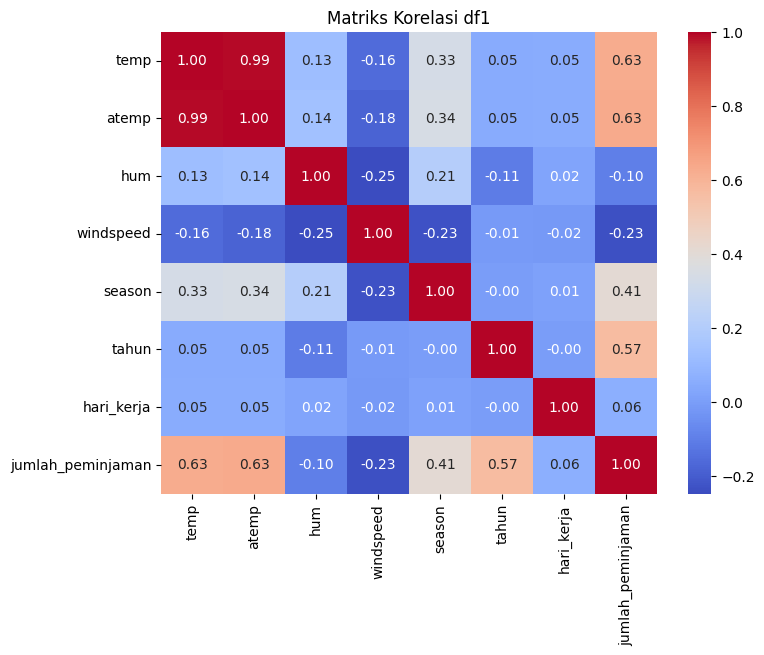

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Mentukan variabel independen (X) dan dependen (Y)
X = df1[["temp", "atemp", "hum", "windspeed", "season", "tahun"]]
y = df1["jumlah_peminjaman"]

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek pembagian data
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing : {len(X_test)}")

## cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data training: 584
Jumlah data testing : 147


,temp,atemp,hum,windspeed,season,tahun
682,0.343333,0.323225,0.662917,0.342046,4,1
250,0.633913,0.555361,0.939565,0.192748,3,0
336,0.299167,0.310604,0.612917,0.095783,4,0
260,0.507500,0.490537,0.695000,0.178483,3,0
543,0.697500,0.640792,0.360000,0.271775,3,1


In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,temp,atemp,hum,windspeed,season,tahun
682,1.0,0.343333,0.323225,0.662917,0.342046,4,1
250,1.0,0.633913,0.555361,0.939565,0.192748,3,0
336,1.0,0.299167,0.310604,0.612917,0.095783,4,0
260,1.0,0.507500,0.490537,0.695000,0.178483,3,0
543,1.0,0.697500,0.640792,0.360000,0.271775,3,1


In [ ]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('--------')
print(model.params)
print('---------')
const = model.params['const']
x1_temp = model.params['temp']
x2_atemp = model.params['atemp']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_temp:.3f}*x1 + {x2_atemp:.3f}*x2")

--------
const        1700.764424
temp         2099.667960
atemp        3963.970700
hum         -2581.915779
windspeed   -2868.902677
season        425.432621
tahun        1984.479164
dtype: float64
---------
y = 1700.764 + 2099.668*x1 + 3963.971*x2


In [ ]:
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      jumlah_peminjaman   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     310.3
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          6.00e-177
Time:                        05:37:38   Log-Likelihood:                -4821.2
No. Observations:                 584   AIC:                             9656.
Df Residuals:                     577   BIC:                             9687.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1700.7644    273.306      6.223      0.0

In [ ]:
import numpy as np

# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi jumlah peminjaman sepeda
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Temperatur": X_test["temp"].to_numpy(),
    "Suhu Terasa (atemp)": X_test["atemp"].to_numpy(),
    "Kelembapan": X_test["hum"].to_numpy(),
    "Kecepatan Angin": X_test["windspeed"].to_numpy(),
    "Musim (season)": X_test["season"].to_numpy(),
    "Tahun": X_test["tahun"].to_numpy(),
    "Jumlah Aktual (cnt)": y_test.to_numpy(),
    "Jumlah Prediksi (cnt)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (cnt)"] = hasil["Jumlah Prediksi (cnt)"] - hasil["Jumlah Aktual (cnt)"]

# 2) Akurasi per-baris (100*(1 - |error/aktual|)), dibatasi 0–100
denom = hasil["Jumlah Aktual (cnt)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (cnt)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan hasil
hasil.head(10)

,Temperatur,Suhu Terasa (atemp),Kelembapan,Kecepatan Angin,Musim (season),Tahun,Jumlah Aktual (cnt),Jumlah Prediksi (cnt),Selisih error (cnt),Akurasi (%)
703,0.475833,0.469054,0.733750,0.174129,4,1,6606,5851.341834,-754.658166,88.576171
33,0.186957,0.177878,0.437826,0.277752,1,0,1550,1296.574535,-253.425465,83.649970
300,0.330833,0.318812,0.585833,0.229479,4,0,3747,3189.971403,-557.028597,85.134011
456,0.425833,0.417287,0.676250,0.172267,2,1,6041,4844.092376,-1196.907624,80.186929
633,0.550000,0.544179,0.570000,0.236321,4,1,7538,6549.227120,-988.772880,86.882822
557,0.716667,0.650271,0.633333,0.151733,3,1,7264,6973.439706,-290.560294,95.999996
39,0.134783,0.144283,0.494783,0.188839,1,0,1605,1161.881430,-443.118570,72.391366
356,0.373333,0.377513,0.686250,0.274246,1,0,2209,1847.898069,-361.101931,83.653149
559,0.731667,0.667933,0.485833,0.080850,3,1,7499,7659.135382,160.135382,97.864577
514,0.722500,0.672992,0.684583,0.295400,2,1,5743,6105.830002,362.830002,93.682222
